# 10Analytics Data Analytics Hackathon

# part 1 Explore

# Table of contents
### <a href='#intro'>-> Introduction</a>
### <a href='#prelim'>-> Preliminary Wrangling</a>
### <a href='#explore'>-> Univariate, Bivariate, and Multivariate Data Exploration</a>
### <a href='#conclude'>-> Conclusions</a>

<a id='intro'></a>
## Introduction

 - This dataset is spread across six tables
 - Table 1. has 7273 rows with 36 columns
 - Table 2 has 6840 rows with 8 columns
 - Table 3 has 11510 rows with 9 columns
 - Table 4 has 254 rows with 6 columns
 - Table 5 has 56913 rows with 4 columns
 - Table 6 has 270 rows with 25 columns
 
 - we drop table 6 due to undefined fields/variables for our exploration

### import the right packages

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import warnings; warnings.simplefilter('ignore')

%matplotlib inline

In [2]:
!pwd
!ls -l

/home/reganmatics/Desktop/desk/DEV/10Analytics/10Alytics_Hackathon_Case Study/Final Datasets
total 4956
-rw-rw-r-- 1 reganmatics reganmatics     186 Dec  3 17:57 '\'
-rw-rw-r-- 1 reganmatics reganmatics 1037054 Dec  3 02:42 '1. annual-number-of-deaths-by-cause.csv'
-rw-rw-r-- 1 reganmatics reganmatics  319182 Dec  3 01:49 '2. number-of-deaths-by-age-group.csv'
-rw-rw-r-- 1 reganmatics reganmatics  536777 Dec  3 02:00 '3. Medical Doctors Per 10000 population.xlsx'
-rw-rw-r-- 1 reganmatics reganmatics   11990 Nov 29 15:26 '4. ISO 3166_country-and-continent-codes-list-csv.csv'
-rw-rw-r-- 1 reganmatics reganmatics 1558562 Nov 29 15:39 '5. World Population.csv'
-rw-rw-r-- 1 reganmatics reganmatics   70841 Dec  3 02:16 '6. Current health expenditure (% of GDP).xlsx'
-rw-rw-r-- 1 reganmatics reganmatics  632582 Dec  3 18:47  part_I_explore.ipynb
-rw-rw-r-- 1 reganmatics reganmatics  882781 Dec  3 18:40  part_I_explore.slides.html
-rw-rw-r-- 1 reganmatics reganmatics     186 Dec  3 17:57  READ

In [3]:
!ls -l

total 4956
-rw-rw-r-- 1 reganmatics reganmatics     186 Dec  3 17:57 '\'
-rw-rw-r-- 1 reganmatics reganmatics 1037054 Dec  3 02:42 '1. annual-number-of-deaths-by-cause.csv'
-rw-rw-r-- 1 reganmatics reganmatics  319182 Dec  3 01:49 '2. number-of-deaths-by-age-group.csv'
-rw-rw-r-- 1 reganmatics reganmatics  536777 Dec  3 02:00 '3. Medical Doctors Per 10000 population.xlsx'
-rw-rw-r-- 1 reganmatics reganmatics   11990 Nov 29 15:26 '4. ISO 3166_country-and-continent-codes-list-csv.csv'
-rw-rw-r-- 1 reganmatics reganmatics 1558562 Nov 29 15:39 '5. World Population.csv'
-rw-rw-r-- 1 reganmatics reganmatics   70841 Dec  3 02:16 '6. Current health expenditure (% of GDP).xlsx'
-rw-rw-r-- 1 reganmatics reganmatics  632582 Dec  3 18:47  part_I_explore.ipynb
-rw-rw-r-- 1 reganmatics reganmatics  882781 Dec  3 18:40  part_I_explore.slides.html
-rw-rw-r-- 1 reganmatics reganmatics     186 Dec  3 17:57  README.md


<a id='prelim'></a>
# Preliminary Wrangling

In [4]:
death_by_cause = pd.read_csv("1. annual-number-of-deaths-by-cause.csv")
death_by_age = pd.read_csv("2. number-of-deaths-by-age-group.csv")
doctor_per_thousand = pd.read_excel("3. Medical Doctors Per 10000 population.xlsx", skiprows=2)
country_codes = pd.read_csv("4. ISO 3166_country-and-continent-codes-list-csv.csv")
world_population = pd.read_csv("5. World Population.csv")
cHealth_expenditure = pd.read_excel("6. Current health expenditure (% of GDP).xlsx")

# create aliases
df1 = death_by_cause
df2 = death_by_age
df3 = doctor_per_thousand
df4 = country_codes
df5 = world_population
df6 = cHealth_expenditure

In [5]:
!pip3 install openpyxl seaborn

Defaulting to user installation because normal site-packages is not writeable


## Access

In [6]:
df1.head()

,Entity,Code,Year,Number of executions (Amnesty International),Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,...,Chronic kidney disease,Poisonings,Protein,Terrorism (deaths),Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis
0,Afghanistan,AFG,2007,15,2933.0,1402.0,450.0,2488.0,393.0,2127.0,...,4490.0,512.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0
1,Afghanistan,AFG,2008,17,2731.0,1424.0,455.0,2277.0,255.0,1973.0,...,4534.0,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0
2,Afghanistan,AFG,2009,0,2460.0,1449.0,460.0,2040.0,239.0,1852.0,...,4597.0,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0
3,Afghanistan,AFG,2011,2,2327.0,1508.0,473.0,1846.0,390.0,1775.0,...,4785.0,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0
4,Afghanistan,AFG,2012,14,2254.0,1544.0,482.0,1705.0,94.0,1716.0,...,4846.0,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0


In [7]:
df2.head()

,Entity,Code,Year,Deaths 70+ years,Deaths 50-69 years,Deaths Age: 15-49 years,Deaths 5-14 years,Deaths Under 5
0,Afghanistan,AFG,1990,34681,40624,22968,5642,78170
1,Afghanistan,AFG,1991,35271,41414,26523,6433,83035
2,Afghanistan,AFG,1992,35694,41829,30000,6854,93859
3,Afghanistan,AFG,1993,36433,42598,32339,7206,106537
4,Afghanistan,AFG,1994,37460,43923,36817,8106,115334


In [8]:
df3.head()

,IndicatorCode,Indicator,ParentLocationCode,ParentLocation,ThreeLocCode,Location,Period,FactValueNumeric,Value
0,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,AGO,Angola,2018,2.14,2.14
1,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,AGO,Angola,2017,2.15,2.15
2,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,AGO,Angola,2009,1.31,1.31
3,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,AGO,Angola,2004,0.62,0.62
4,HWF_0001,"Medical doctors (per 10,000)",AFR,Africa,AGO,Angola,1997,0.59,0.59


In [9]:
df4.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


In [10]:
df4.describe()

,Country_Number
count,250.000000
mean,434.248000
std,252.578388
min,4.000000
25%,219.000000
50%,436.000000
75%,650.500000
max,894.000000


In [11]:
df5.head()

,Entity,Code,Year,Population (historical estimates)
0,Afghanistan,AFG,-10000,14737
1,Afghanistan,AFG,-9000,20405
2,Afghanistan,AFG,-8000,28253
3,Afghanistan,AFG,-7000,39120
4,Afghanistan,AFG,-6000,54166


In [12]:
df6.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,2022-09-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
4,Aruba,ABW,Current health expenditure (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entity                                        7273 non-null   object 
 1   Code                                          6206 non-null   object 
 2   Year                                          7273 non-null   int64  
 3   Number of executions (Amnesty International)  267 non-null    object 
 4   Meningitis                                    6840 non-null   float64
 5   Alzheimer's disease and other dementias       6840 non-null   float64
 6   Parkinson's disease                           6840 non-null   float64
 7   Nutritional deficiencies                      6840 non-null   float64
 8   Malaria                                       6840 non-null   float64
 9   Drowning                                      6840 non-null   f

In [14]:
df1.describe()

,Year,Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,Interpersonal violence,Maternal disorders,HIV/AIDS,...,Chronic kidney disease,Poisonings,Protein,Terrorism (deaths),Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis
count,7273.000000,6840.000000,6.840000e+03,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6.840000e+03,...,6.840000e+03,6840.000000,6840.000000,2891.000000,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6840.000000,6840.000000
mean,2004.425134,8213.149561,2.736319e+04,6493.627339,11006.353947,18903.160234,8619.055117,10636.648684,6131.066959,2.814125e+04,...,2.506893e+04,2145.455848,9531.528801,349.235905,3.063496e+04,9.130390e+04,3.189892e+04,5.652551e+04,3006.043275,3112.066520
std,8.623572,34982.933895,1.113146e+05,25767.447063,48289.687100,97346.780570,35879.406010,40888.793762,26355.210370,1.391973e+05,...,9.600839e+04,8433.507625,41689.675155,1917.143788,1.166999e+05,3.772013e+05,1.194387e+05,2.109884e+05,11211.885249,14440.219516
min,1990.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1997.000000,19.000000,1.287500e+02,37.000000,11.000000,0.000000,39.000000,48.000000,6.000000,1.400000e+01,...,2.140000e+02,8.000000,6.000000,0.000000,2.077500e+02,3.685000e+02,2.047500e+02,4.000000e+02,21.000000,2.000000
50%,2004.000000,150.500000,8.455000e+02,209.000000,159.000000,0.000000,253.000000,342.000000,70.500000,1.870000e+02,...,1.080000e+03,72.000000,120.000000,5.000000,1.239500e+03,2.104000e+03,1.541000e+03,2.778500e+03,152.000000,21.500000
75%,2012.000000,1622.250000,4.251000e+03,984.000000,2204.000000,1017.250000,1014.250000,1391.250000,1244.500000,3.836500e+03,...,4.497500e+03,371.000000,2120.000000,60.000000,5.786250e+03,9.013250e+03,5.670500e+03,9.594000e+03,593.250000,264.000000
max,2019.000000,432524.000000,1.623276e+06,362907.000000,757152.000000,961129.000000,460665.000000,463129.000000,302586.000000,1.844490e+06,...,1.427232e+06,92101.000000,656314.000000,44490.000000,1.285039e+06,3.974315e+06,1.472012e+06,2.557689e+06,129705.000000,166405.000000


##### quality issue:
- data is of type int instead  of datetime object

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Entity                   6840 non-null   object
 1   Code                     6150 non-null   object
 2   Year                     6840 non-null   int64 
 3   Deaths 70+ years         6840 non-null   int64 
 4   Deaths 50-69 years       6840 non-null   int64 
 5   Deaths Age: 15-49 years  6840 non-null   int64 
 6   Deaths 5-14 years        6840 non-null   int64 
 7   Deaths Under 5           6840 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 427.6+ KB


##### quality issue:
- data is of type int instead  of datetime object

In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IndicatorCode       11508 non-null  object 
 1   Indicator           11508 non-null  object 
 2   ParentLocationCode  11508 non-null  object 
 3   ParentLocation      11508 non-null  object 
 4   ThreeLocCode        11508 non-null  object 
 5   Location            11508 non-null  object 
 6   Period              11508 non-null  int64  
 7   FactValueNumeric    11508 non-null  float64
 8   Value               11508 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 809.3+ KB


In [17]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Continent_Name             254 non-null    object 
 1   Continent_Code             212 non-null    object 
 2   Country_Name               254 non-null    object 
 3   Two_Letter_Country_Code    253 non-null    object 
 4   Three_Letter_Country_Code  254 non-null    object 
 5   Country_Number             250 non-null    float64
dtypes: float64(1), object(5)
memory usage: 12.0+ KB


In [18]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56913 entries, 0 to 56912
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Entity                             56913 non-null  object
 1   Code                               54251 non-null  object
 2   Year                               56913 non-null  int64 
 3   Population (historical estimates)  56913 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ MB


In [19]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Data Source                   268 non-null    object 
 1   World Development Indicators  268 non-null    object 
 2   Unnamed: 2                    267 non-null    object 
 3   Unnamed: 3                    233 non-null    float64
 4   Unnamed: 4                    233 non-null    float64
 5   Unnamed: 5                    234 non-null    float64
 6   Unnamed: 6                    236 non-null    float64
 7   Unnamed: 7                    236 non-null    float64
 8   Unnamed: 8                    236 non-null    float64
 9   Unnamed: 9                    236 non-null    float64
 10  Unnamed: 10                   236 non-null    float64
 11  Unnamed: 11                   236 non-null    float64
 12  Unnamed: 12                   236 non-null    float64
 13  Unnam

### we recreate the same columns with selected columns of interest

In [20]:
df1_cols = ['Code','Year', 'Meningitis', 'Malaria', 'Nutritional deficiencies', 'Interpersonal violence','Maternal disorders','Drug use disorders','Tuberculosis','Lower respiratory infections','Conflict and terrorism','Acute hepatitis']
df3_numeric_cols = df3.describe().columns
df1 = df1[df1_cols]
df3 = df3[df3_numeric_cols]

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Code                          6206 non-null   object 
 1   Year                          7273 non-null   int64  
 2   Meningitis                    6840 non-null   float64
 3   Malaria                       6840 non-null   float64
 4   Nutritional deficiencies      6840 non-null   float64
 5   Interpersonal violence        6840 non-null   float64
 6   Maternal disorders            6840 non-null   float64
 7   Drug use disorders            6840 non-null   float64
 8   Tuberculosis                  6840 non-null   float64
 9   Lower respiratory infections  6840 non-null   float64
 10  Conflict and terrorism        6840 non-null   float64
 11  Acute hepatitis               6840 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 682.0+ KB


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Period            11508 non-null  int64  
 1   FactValueNumeric  11508 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 179.9 KB


#### next we drop empty cells and entries

In [23]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()
df5 = df5.dropna()

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6150 entries, 0 to 7272
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Code                          6150 non-null   object 
 1   Year                          6150 non-null   int64  
 2   Meningitis                    6150 non-null   float64
 3   Malaria                       6150 non-null   float64
 4   Nutritional deficiencies      6150 non-null   float64
 5   Interpersonal violence        6150 non-null   float64
 6   Maternal disorders            6150 non-null   float64
 7   Drug use disorders            6150 non-null   float64
 8   Tuberculosis                  6150 non-null   float64
 9   Lower respiratory infections  6150 non-null   float64
 10  Conflict and terrorism        6150 non-null   float64
 11  Acute hepatitis               6150 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 624.6+ KB


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6150 entries, 0 to 6839
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Entity                   6150 non-null   object
 1   Code                     6150 non-null   object
 2   Year                     6150 non-null   int64 
 3   Deaths 70+ years         6150 non-null   int64 
 4   Deaths 50-69 years       6150 non-null   int64 
 5   Deaths Age: 15-49 years  6150 non-null   int64 
 6   Deaths 5-14 years        6150 non-null   int64 
 7   Deaths Under 5           6150 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 432.4+ KB


In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Period            11508 non-null  int64  
 1   FactValueNumeric  11508 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 179.9 KB


In [27]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 249
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Continent_Name             207 non-null    object 
 1   Continent_Code             207 non-null    object 
 2   Country_Name               207 non-null    object 
 3   Two_Letter_Country_Code    207 non-null    object 
 4   Three_Letter_Country_Code  207 non-null    object 
 5   Country_Number             207 non-null    float64
dtypes: float64(1), object(5)
memory usage: 11.3+ KB


In [28]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54251 entries, 0 to 56912
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Entity                             54251 non-null  object
 1   Code                               54251 non-null  object
 2   Year                               54251 non-null  int64 
 3   Population (historical estimates)  54251 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.1+ MB


In [29]:
df5.describe()

,Year,Population (historical estimates)
count,54251.000000,5.425100e+04
mean,1598.673352,2.220491e+07
std,1432.241586,2.170876e+08
min,-10000.000000,0.000000e+00
25%,1832.000000,1.227220e+05
50%,1899.000000,1.100000e+06
75%,1964.000000,4.811102e+06
max,2021.000000,7.909295e+09


In [30]:
df5 = df5[df5['Year'] >= 1990]
df5.describe()

,Year,Population (historical estimates)
count,7622.000000,7.622000e+03
mean,2005.510102,5.555814e+07
std,9.223271,4.448463e+08
min,1990.000000,7.620000e+02
25%,1998.000000,3.359802e+05
50%,2006.000000,4.481360e+06
75%,2013.000000,1.704104e+07
max,2021.000000,7.909295e+09


In [31]:
df5.Year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

<a id='explore'></a>
# Visualisations

## Bivariate explorations

### plots for df1 (death_by_cause)

Text(0.5, 1.0, 'Malaria vs Nutritional deficiencies')

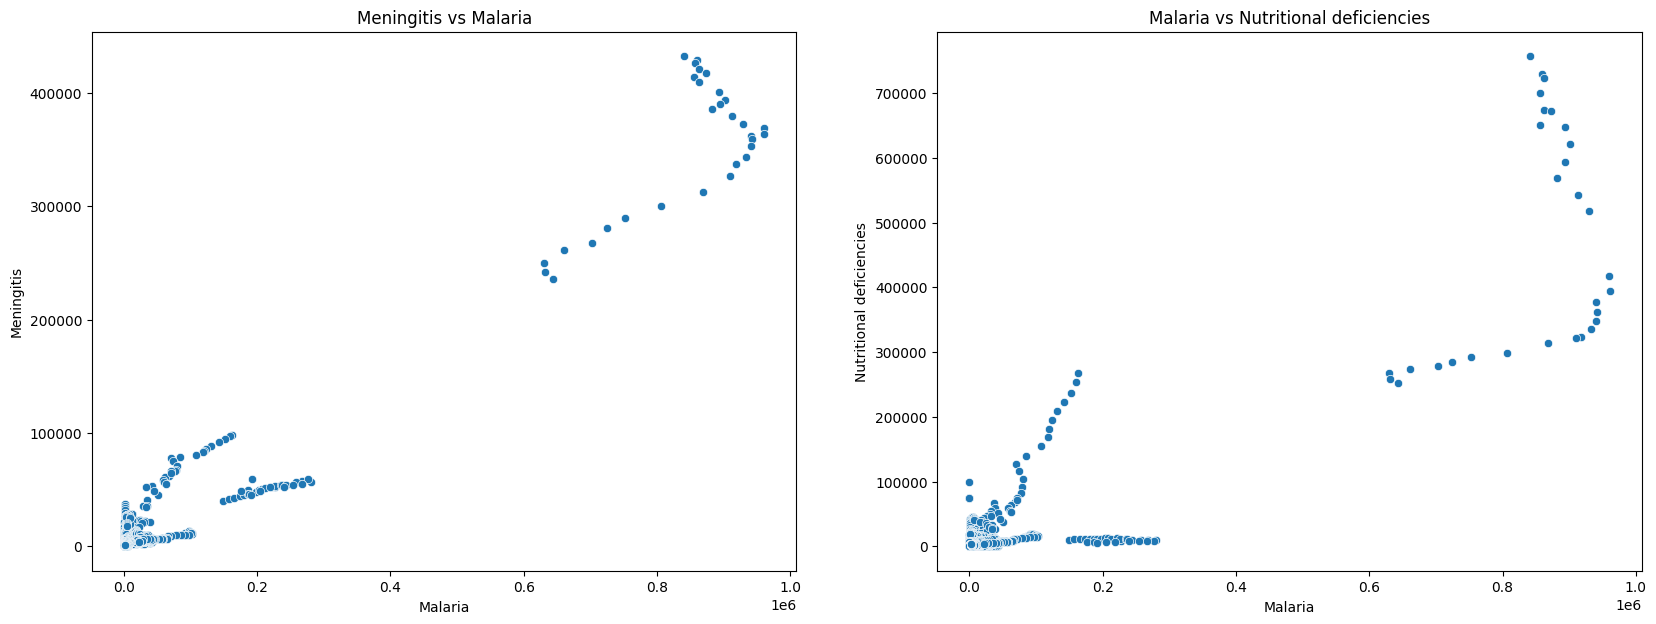

In [32]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,2)

plt.subplot(1,2,1)
sb.scatterplot(data=df1, x='Malaria', y='Meningitis')
plt.title('Meningitis vs Malaria')

plt.subplot(1,2,2)
sb.scatterplot(data=df1, x='Malaria', y='Nutritional deficiencies')
plt.title('Malaria vs Nutritional deficiencies')

### observation
- Theres a positve relationship between ```Meningitis``` and ```Malaria```.
- There's also a positive relationship between ```Nutritional deficiency``` and ```Malaria```

#### ```Drug use disorders``` vs ```(Interpersonal violence/Conflict an dterrorism```

Text(0.5, 1.0, 'Conflict and terrorism vs Drug use disorders')

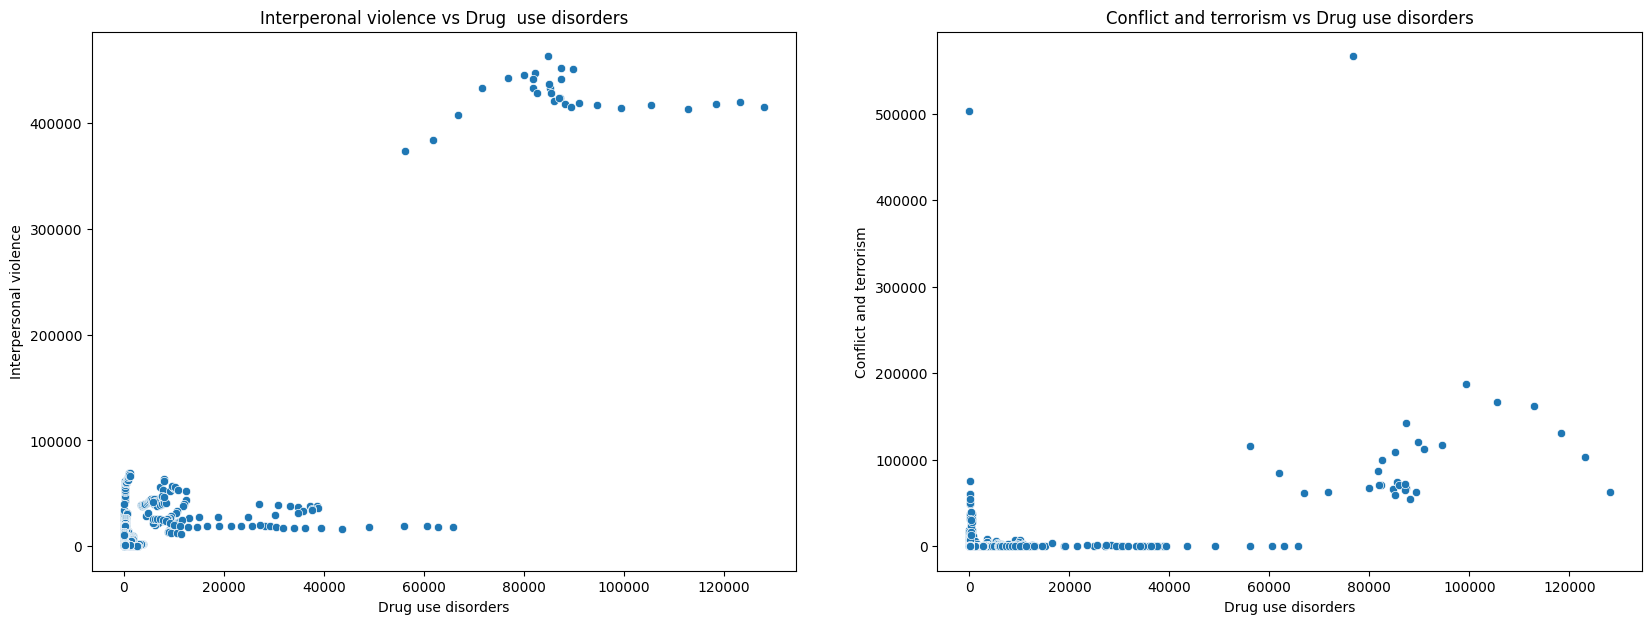

In [33]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,2)

plt.subplot(1,2,1)
sb.scatterplot(data=df1, y='Interpersonal violence', x='Drug use disorders')
plt.title('Interperonal violence vs Drug  use disorders')

plt.subplot(1,2,2)
sb.scatterplot(data=df1, x='Drug use disorders', y='Conflict and terrorism')
plt.title('Conflict and terrorism vs Drug use disorders')

### observaions
- There's astrong relationship between ```Interpersonal violence``` and ```Drug use disorders.```
- There's no clear sign of a positive relationship between ```Conflict and terrorism``` and ```Drug use disorders.```

#### year vs (```malaria```, ```Meningitis```, ```Nutritional deficiencies```)

Text(0.5, 1.0, 'year vs Maternal disorders')

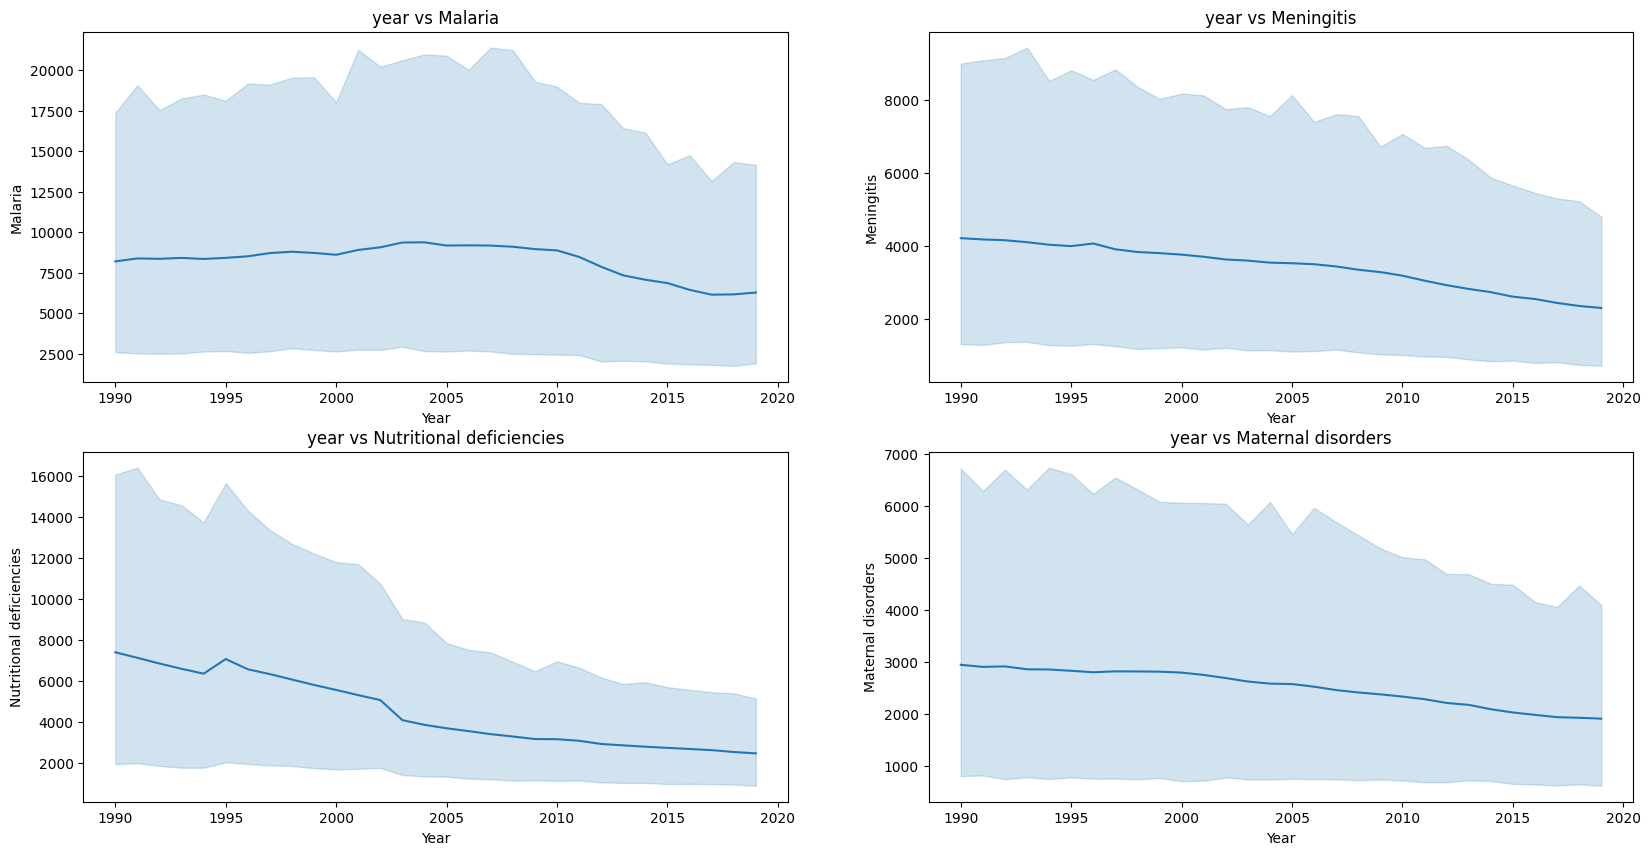

In [34]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,2)

plt.subplot(2,2,1)
sb.lineplot(data=df1, x='Year', y='Malaria')
plt.title('year vs Malaria')

plt.subplot(2,2,2)
sb.lineplot(data=df1, x='Year', y='Meningitis')
plt.title('year vs Meningitis')

plt.subplot(2,2,3)
sb.lineplot(data=df1, x='Year', y='Nutritional deficiencies')
plt.title('year vs Nutritional deficiencies')

plt.subplot(2,2,4)
sb.lineplot(data=df1, x='Year', y='Maternal disorders')
plt.title('year vs Maternal disorders')

### Observations
- There's an overall decrease in deaths.

### plots for  df2 (death_by_age)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6150 entries, 0 to 6839
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Entity                   6150 non-null   object
 1   Code                     6150 non-null   object
 2   Year                     6150 non-null   int64 
 3   Deaths 70+ years         6150 non-null   int64 
 4   Deaths 50-69 years       6150 non-null   int64 
 5   Deaths Age: 15-49 years  6150 non-null   int64 
 6   Deaths 5-14 years        6150 non-null   int64 
 7   Deaths Under 5           6150 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 432.4+ KB


### ```Year``` vs (```Deaths Under 5```, ```Deaths 5-14 years```, ```Deaths Age: 15-49 years```, ```Deaths 50-69 years```

Text(0.5, 1.0, 'Year vs Deaths 50-69 years')

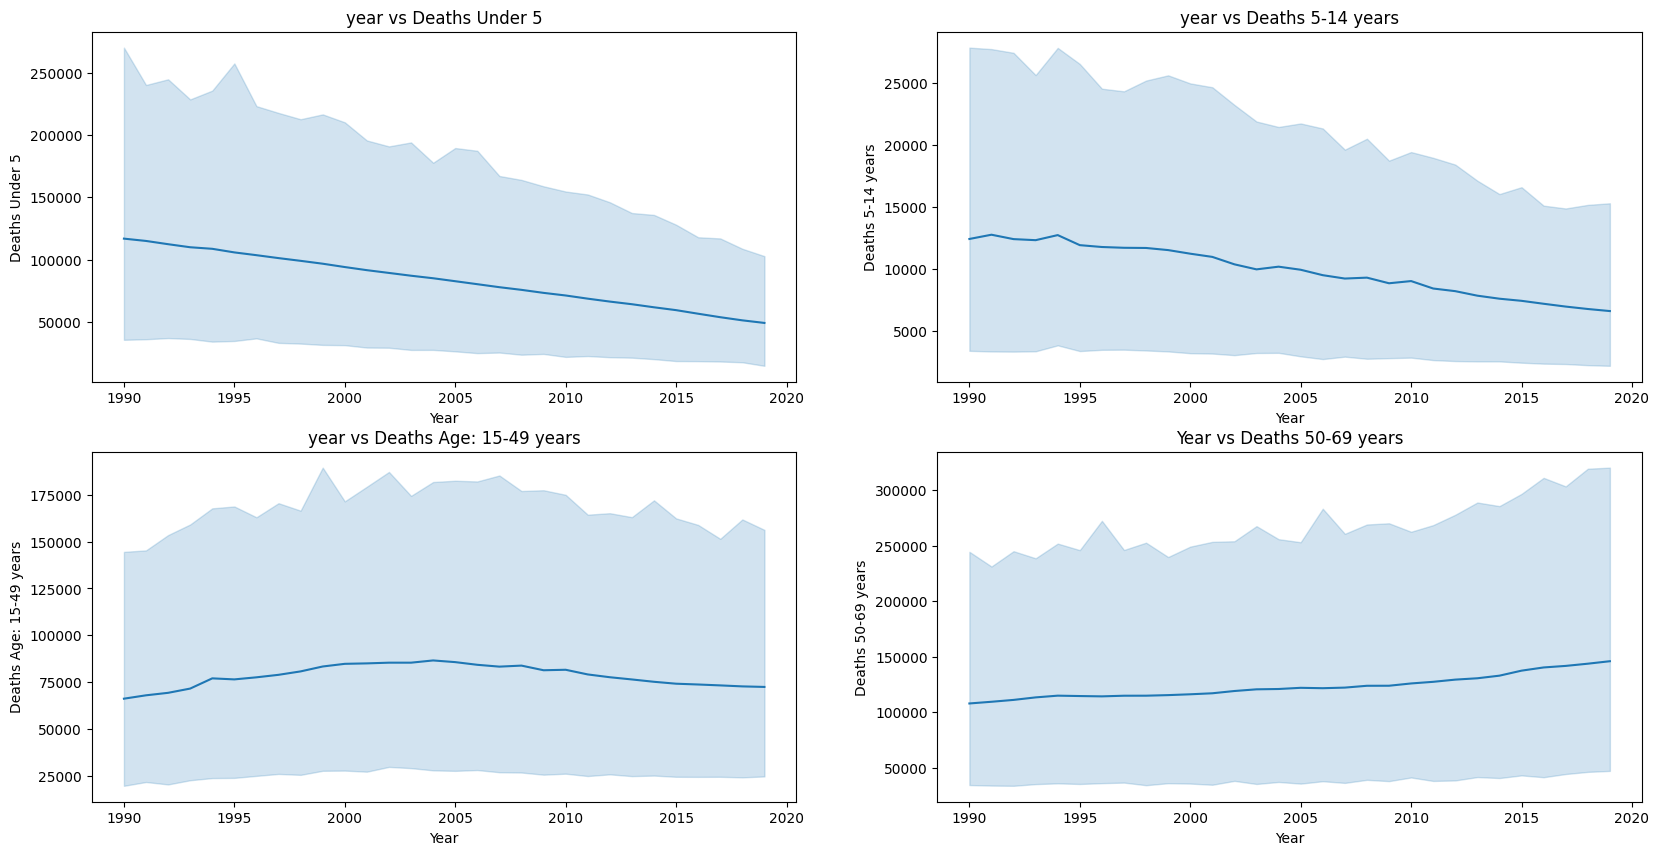

In [36]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,2)

plt.subplot(2,2,1)
sb.lineplot(data=df2, x='Year', y='Deaths Under 5')
plt.title('year vs Deaths Under 5')

plt.subplot(2,2,2)
sb.lineplot(data=df2, x='Year', y='Deaths 5-14 years')
plt.title('year vs Deaths 5-14 years')

plt.subplot(2,2,3)
sb.lineplot(data=df2, x='Year', y='Deaths Age: 15-49 years')
plt.title('year vs Deaths Age: 15-49 years')

plt.subplot(2,2,4)
sb.lineplot(data=df2, x='Year', y='Deaths 50-69 years')
plt.title('Year vs Deaths 50-69 years')

### Observations
- The deat rate for ages 0 to 14 sees a steady decline.
- However, for ages to 49 the death rate seems steady.
- For the ge 50 - 69 we see a slight increase in the death rate.

## Plots for df5 (world_population)

In [37]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7622 entries, 227 to 56912
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Entity                             7622 non-null   object
 1   Code                               7622 non-null   object
 2   Year                               7622 non-null   int64 
 3   Population (historical estimates)  7622 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 297.7+ KB


<AxesSubplot: xlabel='Year', ylabel='Population (historical estimates)'>

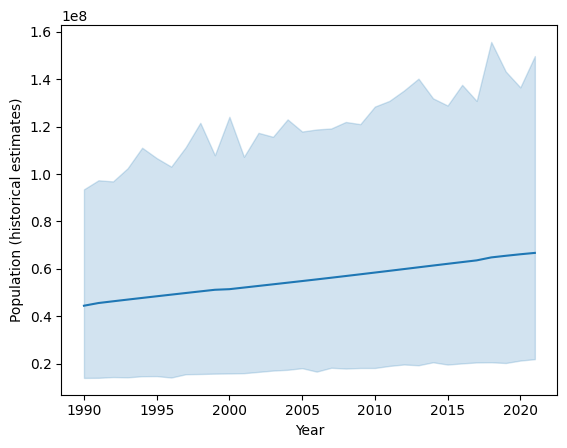

In [38]:
sb.lineplot(data=df5, x='Year', y='Population (historical estimates)')

## Observations
- There is a sharp increase in the Population over the years

<a id='conclude'></a>
## Conclusions

In [ ]:
!jupyter nbconvert part_I_explore.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook part_I_explore.ipynb to slides
[NbConvertApp] Writing 875713 bytes to part_I_explore.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/part_I_explore.slides.html
Use Control-C to stop this server
